
## Clustering algorithms:
https://insights.daffodilsw.com/blog/top-5-clustering-algorithms-in-machine-learning


## Evalutations metrics:
https://www.geeksforgeeks.org/clustering-metrics/

## K Means Clustering
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

# df = pd.read_csv('Spotify_Youtube.csv') # REENABLE LATER
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Spotify_Youtube.csv')

# Basic info

In [92]:
# Features and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [93]:
# Summary statistics for the dataset
df.describe()

Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165272      0.214147      3.576449      4.632749   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518000      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536000   
75%    15537.750000      0.740250      0.798000      8.000000     -4.931000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20716.000000  20716.000000      20716.000000  20716.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111960      0.286299          0.193262      0.168531   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094100   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477250          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20716.000000  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04   
mean       0.529853    120.638340  2.247176e+05  9.393782e+07  6.633411e+05   
std        0.245441     29.579018  1.247905e+05  2.746443e+08  1.789324e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     97.002000  1.800095e+05  1.826002e+06  2.158100e+04   
50%        0.537000    119.965000  2.132845e+05  1.450110e+07  1.244810e+05   
75%        0.726250    139.935000  2.524430e+05  7.039975e+07  5.221480e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments        Stream  
count  2.014900e+04  2.014200e+04  
mean   2.751899e+04  1.359422e+08  
std    1.932347e+05  2.441321e+08  
min    0.000000e+00  6.574000e+03  
25%    5.090000e+02  1.767486e+07  
50%    3.277000e+03  4.968298e+07  
75%    1.436000e+04  1.383581e+08  
max    1.608314e+07  3.386520e+09

In [94]:
df.shape

(20718, 28)

For this exploration, we only want to look at numerical columns:

In [95]:
# display Numerical and Categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns: {len(numerical_columns)}")
print(numerical_columns)
print(f"Categorical Columns: {len(categorical_columns)}")
print(categorical_columns)
print(f"Total Columns: {len(df.columns)}")

Numerical Columns: 16
['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
Categorical Columns: 12
['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']
Total Columns: 28


# Sub-sampling

In [96]:
# Sub-samples for observation purpose
df_only_numerical = df[numerical_columns]
df_only_numerical.sample(n=10)

Unnamed: 0  Danceability  Energy   Key  Loudness  Speechiness  \
9823         9823         0.314   0.475   5.0   -12.380       0.0838   
10863       10863         0.323   0.405  10.0    -8.533       0.0413   
11659       11659         0.363   0.665   8.0   -11.735       0.0375   
11733       11733         0.624   0.551   0.0    -6.871       0.0330   
16753       16753         0.381   0.627   4.0    -5.446       0.1140   
16862       16862         0.352   0.666   1.0    -4.909       0.0512   
6138         6138         0.522   0.790   9.0    -6.242       0.0252   
4973         4973         0.601   0.835   4.0    -8.274       0.0614   
15272       15272         0.865   0.573   5.0    -5.501       0.0678   
14501       14501         0.933   0.448   8.0    -4.491       0.1360   

       Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
9823        0.77900          0.005390    0.3400    0.312   78.992   
10863       0.84900          0.000544    0.1380    0.274  145.104   
11659       0.54000          0.968000    0.0895    0.566  153.977   
11733       0.28500          0.000000    0.2340    0.229  149.970   
16753       0.23200          0.000000    0.0803    0.458  187.835   
16862       0.11700          0.000002    0.0934    0.227  169.965   
6138        0.00581          0.001020    0.2880    0.244   96.062   
4973        0.07930          0.005700    0.0792    0.819   92.995   
15272       0.08630          0.000000    0.3050    0.563   94.999   
14501       0.02530          0.000000    0.1040    0.737  103.981   

       Duration_ms        Views      Likes  Comments       Stream  
9823      310073.0   57856607.0   746233.0   19750.0   46358811.0  
10863     194848.0  517662359.0  3417238.0       0.0  321316598.0  
11659     131889.0    6468667.0   108947.0    4347.0   12423771.0  
11733     314000.0  134542653.0  1074411.0   18167.0   23230862.0  
16753     155863.0   11208169.0    68311.0    1303.0   53287100.0  
16862     244235.0    2503589.0    46739.0    1406.0   16580575.0  
6138      184293.0    3265280.0    18719.0     853.0   14166012.0  
4973      243987.0      13318.0      129.0      36.0     302544.0  
15272     155960.0  188335794.0   851828.0   10070.0  287512221.0  
14501     167350.0  267180591.0   987715.0   36981.0  115712311.0

<Axes: >

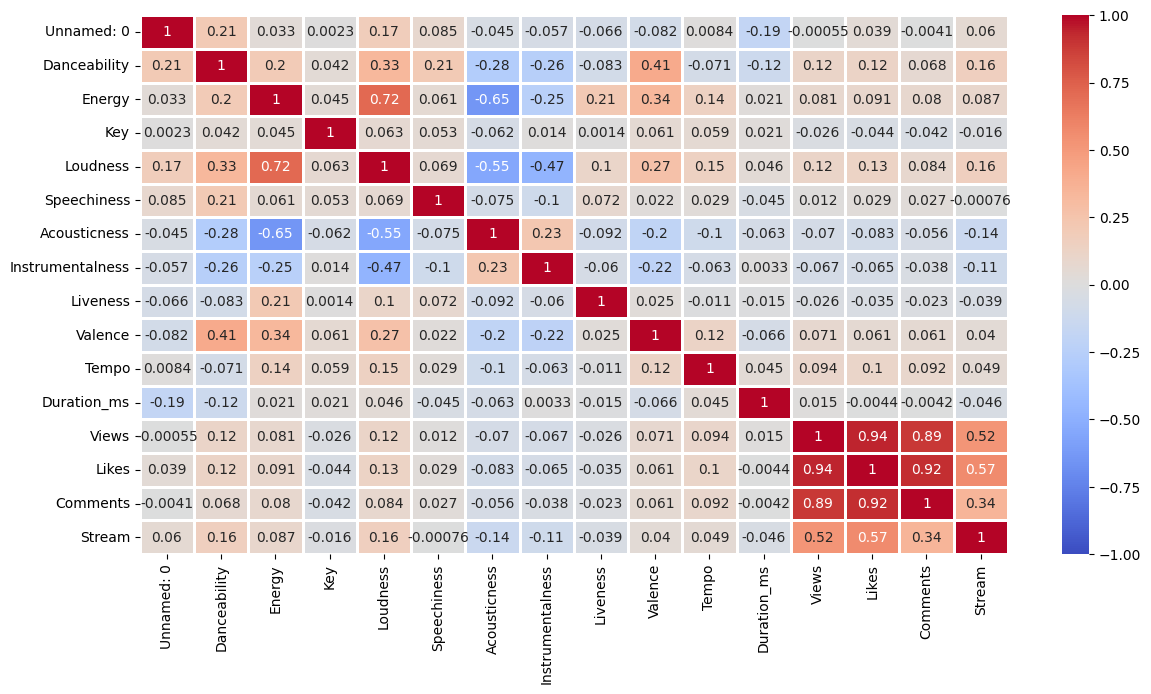

In [97]:
SAMPLE_SIZE = 1000
# Picking a random sample of observations so that it is less time consuming and compute intensive to create heatmap
df_only_numerical_subsample = df_only_numerical.sample(SAMPLE_SIZE)

# To set the size of the figure in which the correlation heatmap is displyed
plt.figure(figsize=(14, 7))
sns.heatmap(df_only_numerical_subsample.corr(method='pearson'), annot = True, linewidth=1, fmt='.2g',
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"fontsize": 10})

# Heatmap

In [98]:
# display most frequent artists
n = 5
freq_artists = df['Artist'].value_counts()[:n].index.tolist()
freq_artists

['Gorillaz',
 'Die drei !!!',
 'Hollywood Undead',
 'Empire of the Sun',
 'White Noise for Babies']

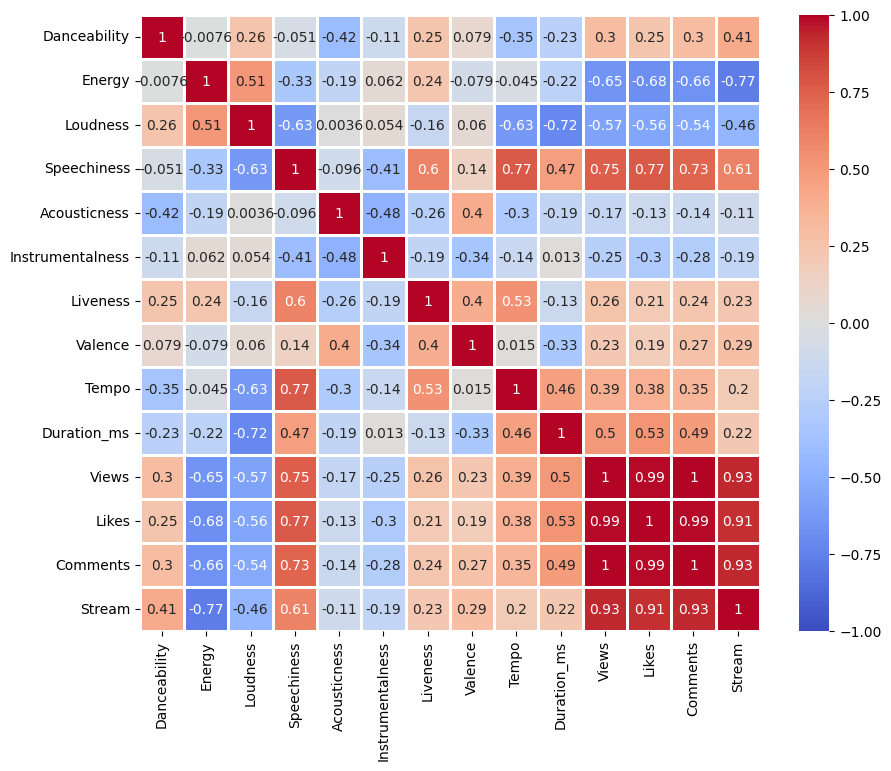

In [99]:
# looking for trends in songs of the SAME ARTIST

df_Gorillaz = df[df['Artist'] == 'Gorillaz']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_Gorillaz_num = df_Gorillaz[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_Gorillaz_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2,
            fmt='.2g', cmap= 'coolwarm', annot=True)
plt.show()

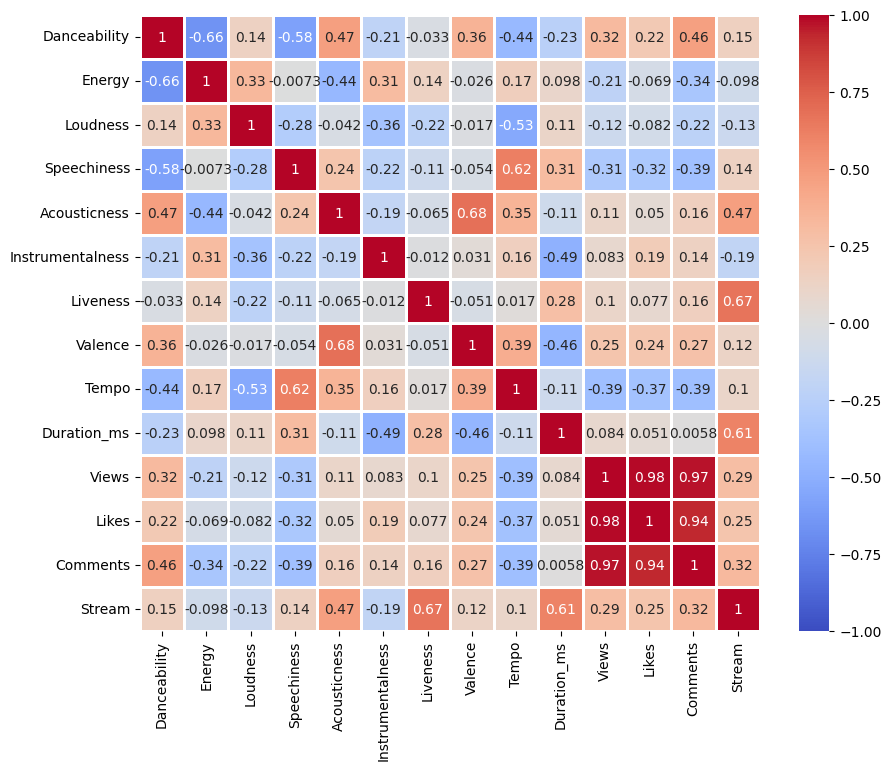

In [100]:
df_HU = df[df['Artist'] == 'Hollywood Undead']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_HU_num = df_HU[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_HU_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2, fmt='.2g',
            cmap= 'coolwarm', annot=True)
plt.show()

# Pairplot

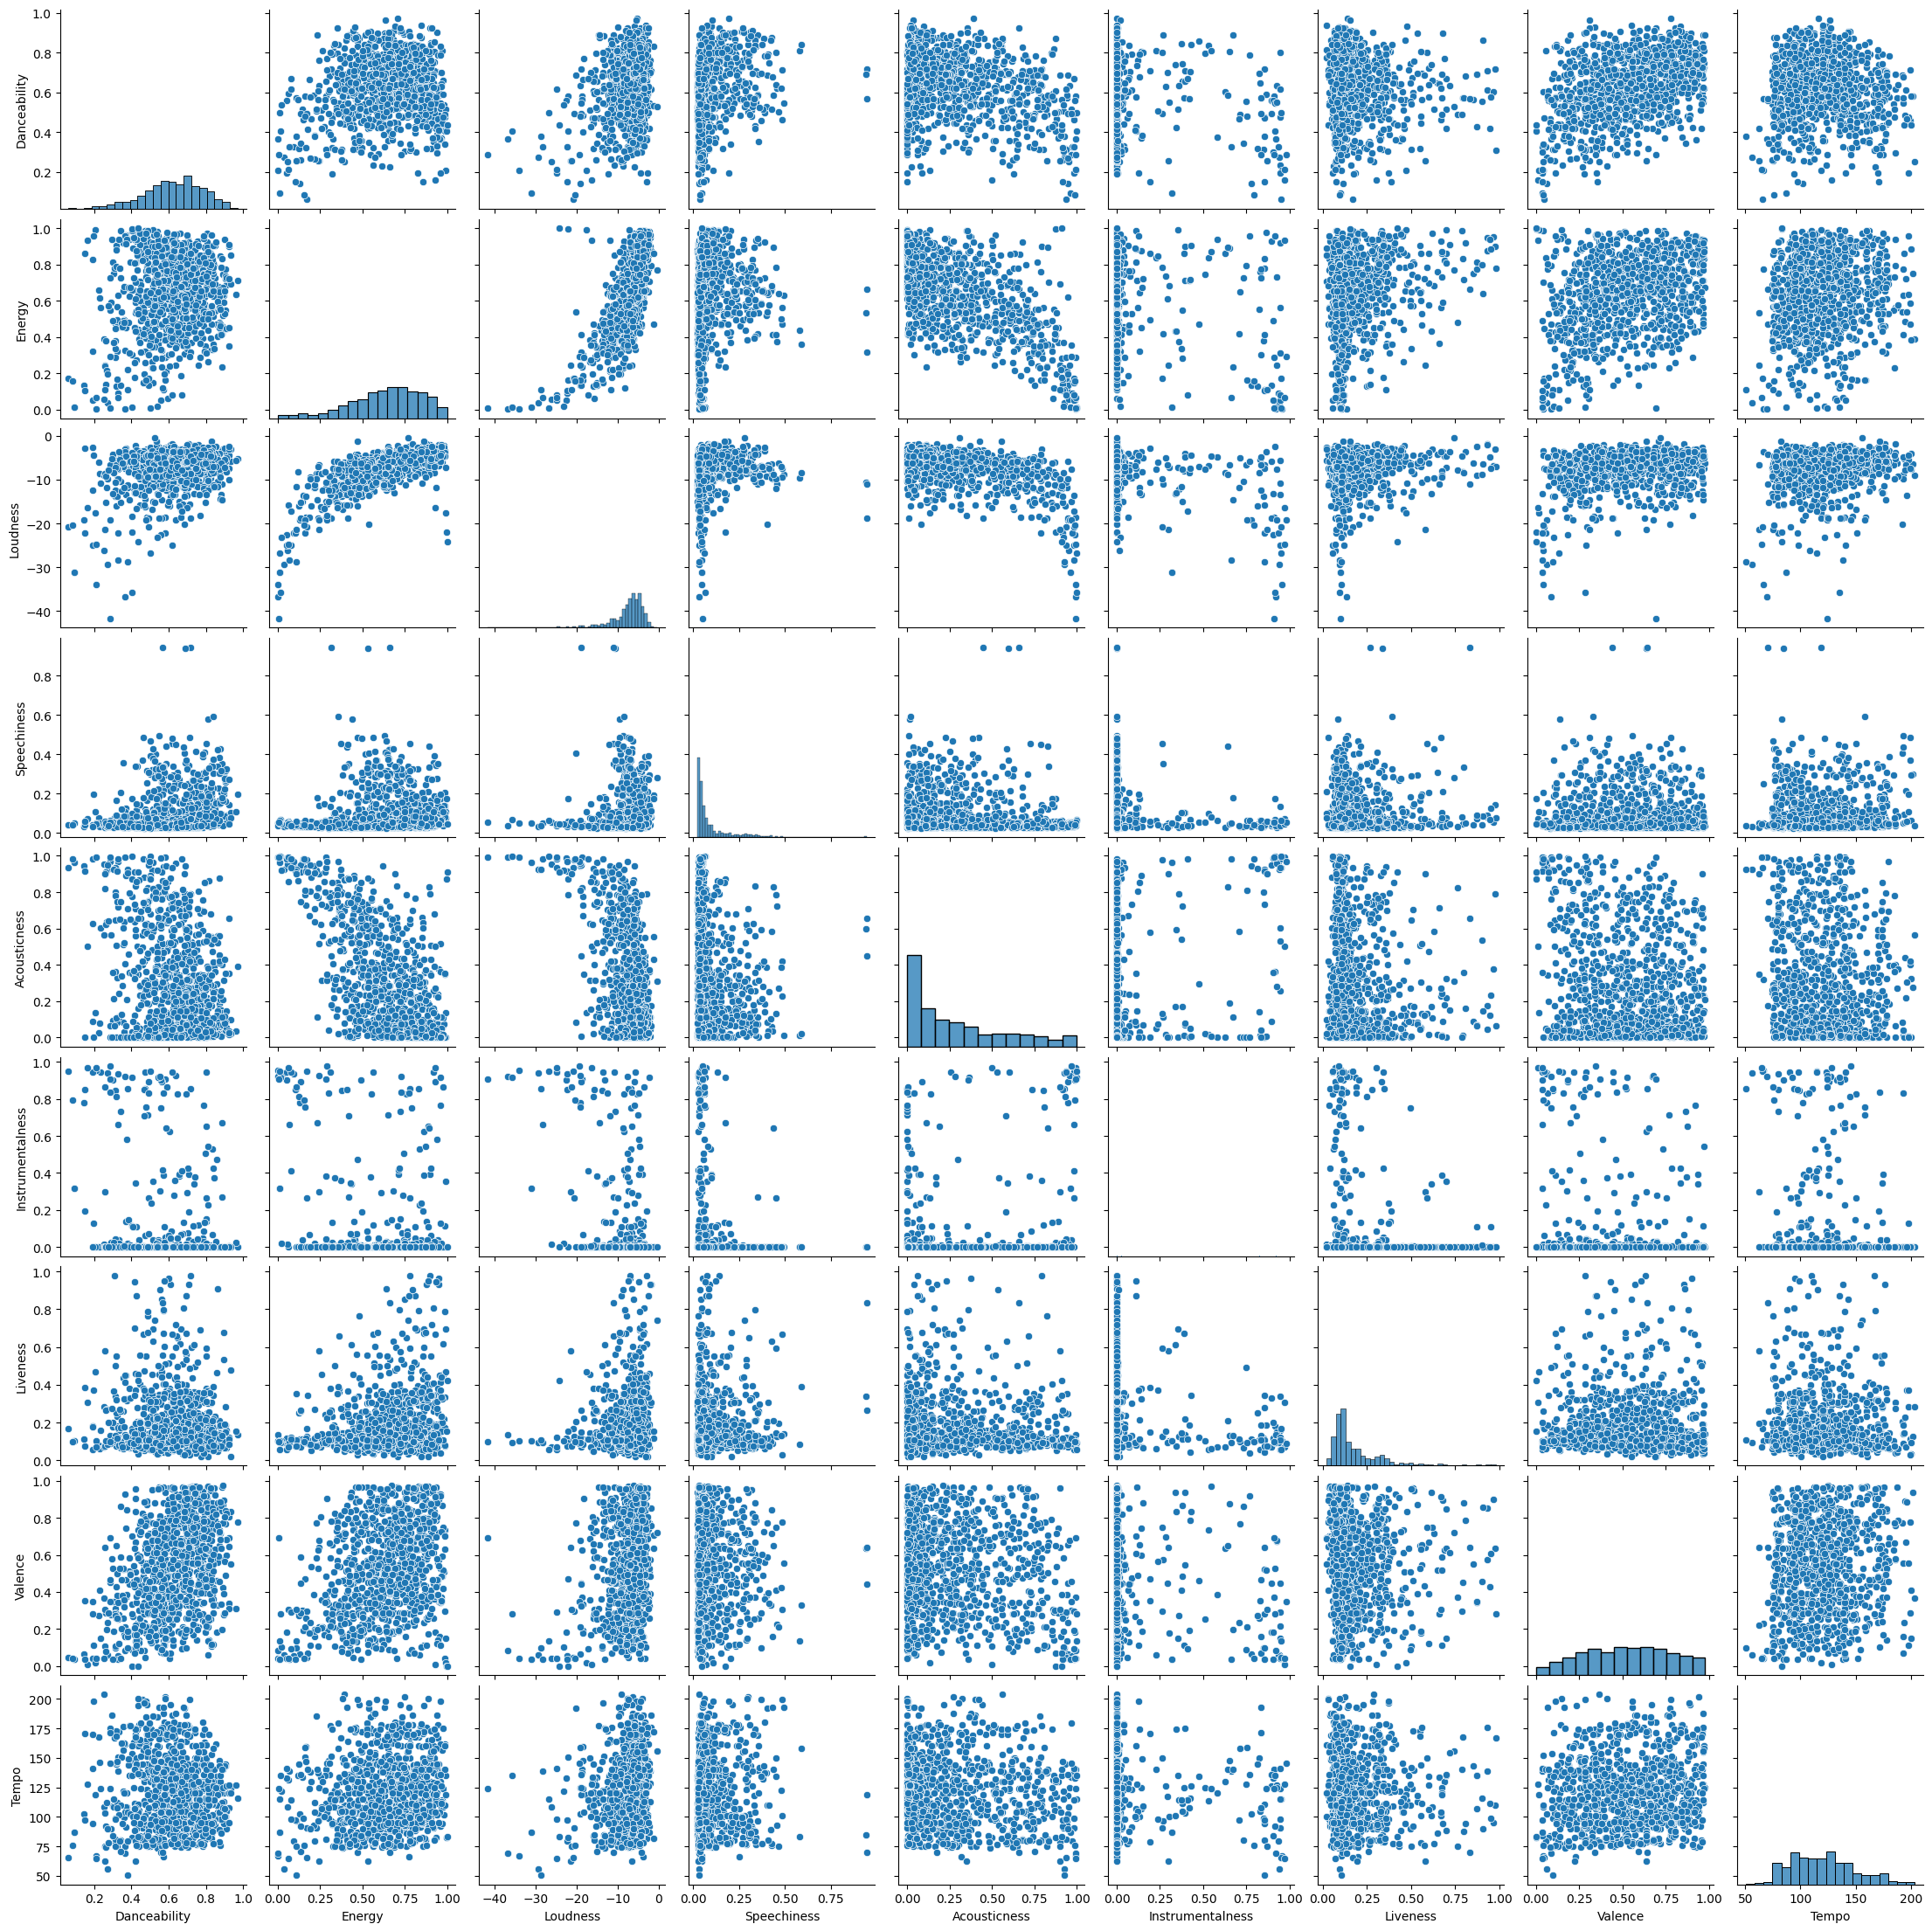

In [101]:
#generate pairplots for relavent numerical vairable
df_important = df_only_numerical_subsample[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
sns.pairplot(df_important)
plt.show()

# Histogram

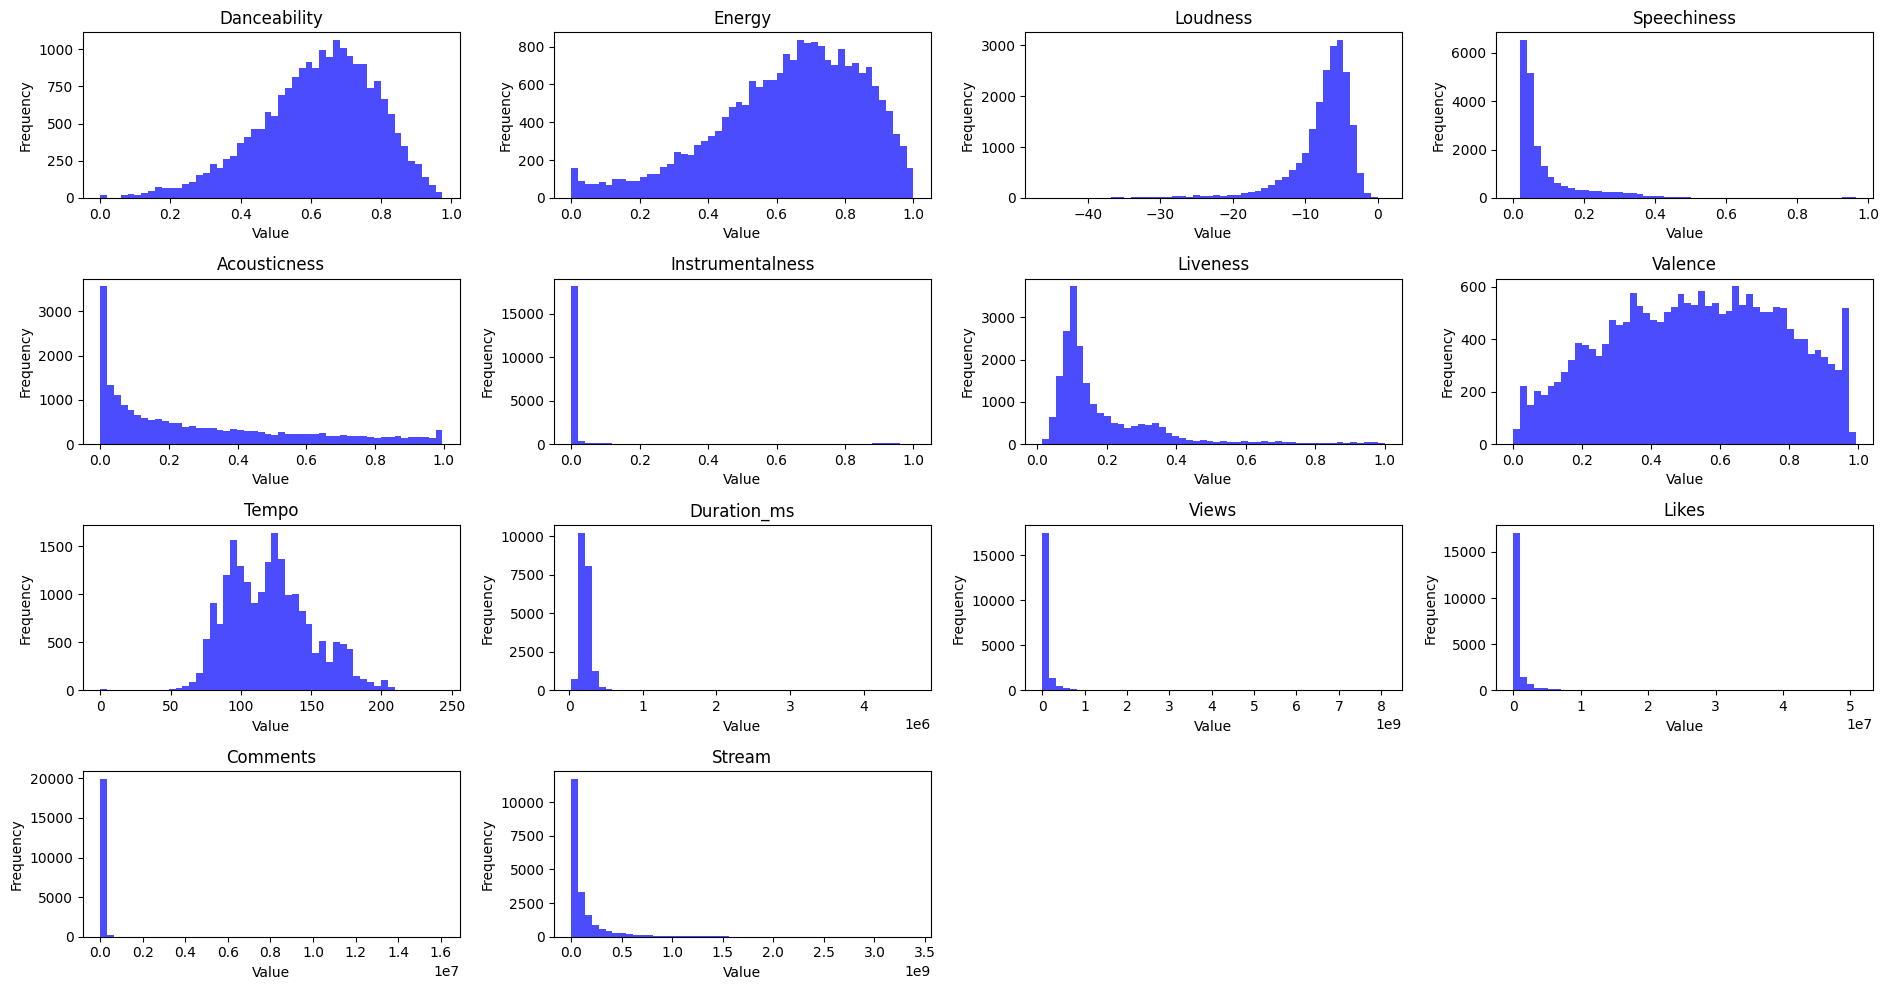

In [102]:
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)  # Calculate rows, add an extra row if needed

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for idx, column in enumerate(num_cols):
    axs[idx].hist(df[column], bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_xlabel('Value')

# Hide any empty subplots
for ax in axs[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


As we can see from the above graphs, some data categories like views, likes, comments, and streams are highly skewed. Therefore, we need to scale them logarithmicly to normalize them:

# Histogram with logarithmic transformation

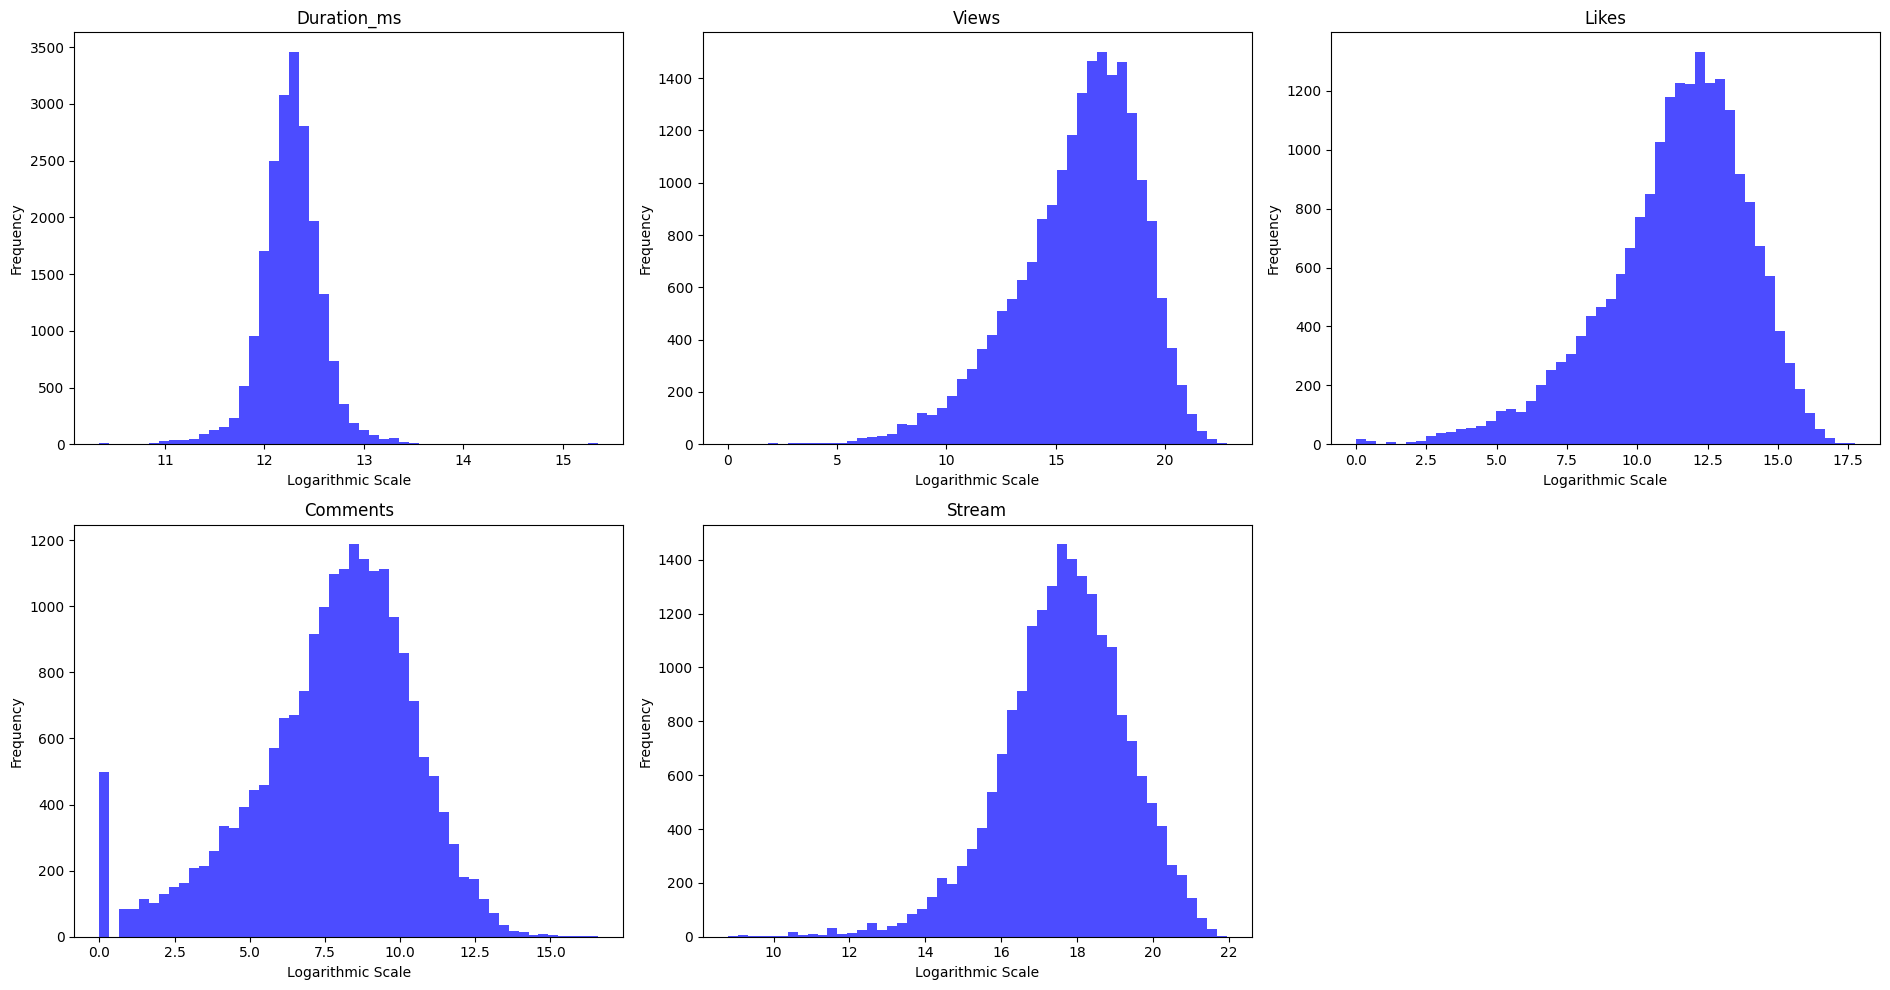

In [103]:
logarithmic_categories = ["Duration_ms", "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = len(logarithmic_categories) // n_cols + (1 if len(logarithmic_categories) % n_cols > 0 else 0)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))
axs = axs.flatten()

for idx, column in enumerate(logarithmic_categories):
    # Apply a logarithmic transformation with a small shift to handle zero values
    logarithmic_data = np.log(df[column] + 1)
    axs[idx].hist(logarithmic_data, bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_xlabel('Logarithmic Scale')
    axs[idx].set_ylabel('Frequency')

# Hide any empty subplots
for ax in axs[len(logarithmic_categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Pie charts

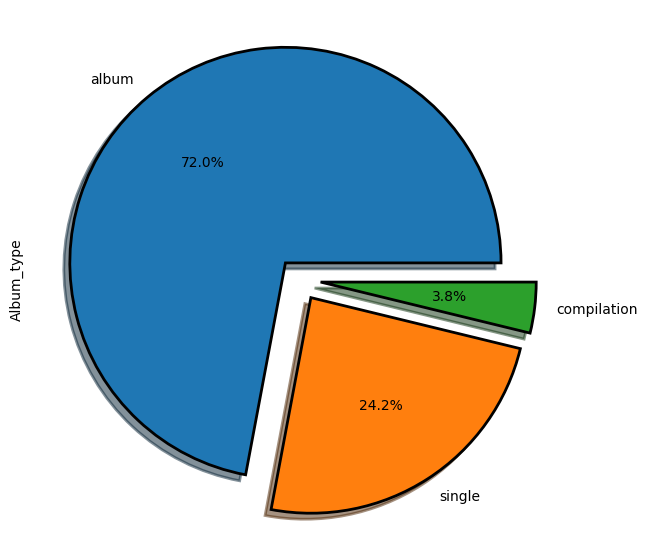

In [104]:
df_only_categorical = df[categorical_columns]
df_only_categorical['Album_type'].value_counts()

fig = plt.figure(figsize=(10, 7))
df_only_categorical['Album_type'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,explode=(0.1,0.1,0.1),wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

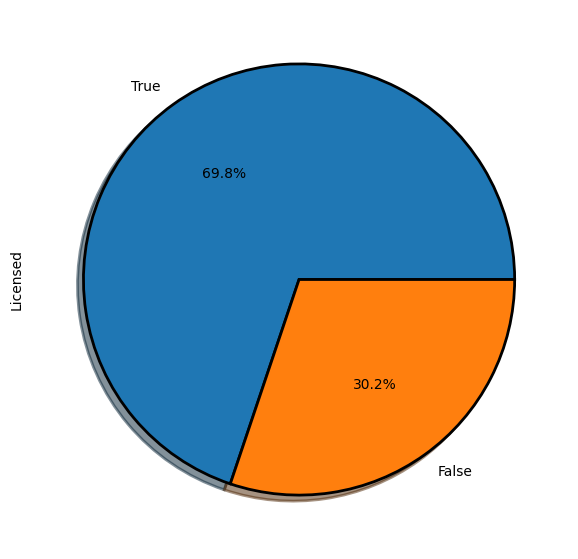

In [105]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['Licensed'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

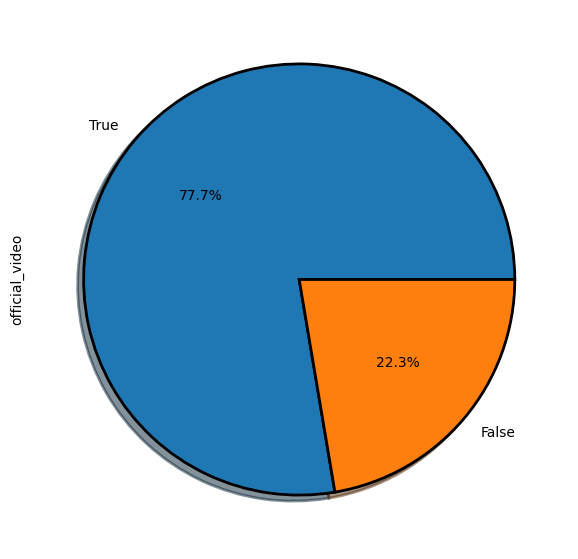

In [106]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['official_video'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

#Dropping Irrelevant Features

We would want to drop some features from our dataset that are not relevant for hte purposes of traning the model. They will however be used in later stages of this project.

These are columns that hold values which are unique to each of the records in our dataset. Some of these include the song's title, url, description, etc.

In the end after the model is trained and when we provide song recommendations to users after performing clustering, this information would be used.

In [107]:
def drop_irrelevant_cols(df, irrelevant_columns):

    input_num_cols = df.shape[1]
    print(f"The original dataset has {input_num_cols} columns", end = "\n\n")

    df = df.drop(columns=irrelevant_columns)
    print(f"{len(irrelevant_columns)} columns were successfully dropped from the dataframe!")
    print(irrelevant_columns, end = "\n\n")

    output_num_cols = df.shape[1]
    print(f"The final dataset has {output_num_cols} columns", end = "\n\n")

    return df

In [108]:
irrelevant_columns = ['Url_youtube', 'Url_spotify', 'Uri', 'Unnamed: 0', 'Channel', 'Licensed', 'official_video']
df = drop_irrelevant_cols(df, irrelevant_columns)
df.head()

The original dataset has 28 columns

7 columns were successfully dropped from the dataframe!
['Url_youtube', 'Url_spotify', 'Uri', 'Unnamed: 0', 'Channel', 'Licensed', 'official_video']

The final dataset has 21 columns



Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy   Key  Loudness  Speechiness  Acousticness  ...  Liveness  Valence  \
0   0.705   6.0    -6.679       0.1770      0.008360  ...    0.6130    0.772   
1   0.703   8.0    -5.815       0.0302      0.086900  ...    0.0463    0.852   
2   0.923   1.0    -3.930       0.0522      0.042500  ...    0.1160    0.551   
3   0.739   2.0    -5.810       0.0260      0.000015  ...    0.0640    0.578   
4   0.694  10.0    -8.627       0.1710      0.025300  ...    0.0698    0.525   

     Tempo  Duration_ms                                              Title  \
0  138.559     222640.0         Gorillaz - Feel Good Inc. (Official Video)   
1   92.761     200173.0  Gorillaz - Rhinestone Eyes [Storyboard Film] (...   
2  108.014     215150.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  120.423     233867.0     Gorillaz - On Melancholy Hill (Official Video)   
4  167.953     340920.0         Gorillaz - Clint Eastwood (Official Video)   

         Views      Likes  Comments  \
0  693555221.0  6220896.0  169907.0   
1   72011645.0  1079128.0   31003.0   
2    8435055.0   282142.0    7399.0   
3  211754952.0  1788577.0   55229.0   
4  618480958.0  6197318.0  155930.0   

                                         Description        Stream  
0  Official HD Video for Gorillaz' fantastic trac...  1.040235e+09  
1  The official video for Gorillaz - Rhinestone E...  3.100837e+08  
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  6.306347e+07  
3  Follow Gorillaz online:\nhttp://gorillaz.com \...  4.346636e+08  
4  The official music video for Gorillaz - Clint ...  6.172597e+08  

[5 rows x 21 columns]

#Data Imputation

There are some records in the dataset that have null values. Since this only applies to less than 3 percent of the data, we will be dropping it.

In [109]:
def drop_null_values(df):

    initial_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe before dropping nulls: {initial_num_rows}", end = "\n\n")

    df.dropna(inplace=True)
    print(f"Null values were dropped from the dataframe!", end = "\n\n")

    output_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe after dropping nulls: {output_num_rows}", end = "\n\n")

    return df

In [110]:
df = drop_null_values(df)
df.head()

Number of rows in the dataframe before dropping nulls: 20718

Null values were dropped from the dataframe!

Number of rows in the dataframe after dropping nulls: 19170



Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy   Key  Loudness  Speechiness  Acousticness  ...  Liveness  Valence  \
0   0.705   6.0    -6.679       0.1770      0.008360  ...    0.6130    0.772   
1   0.703   8.0    -5.815       0.0302      0.086900  ...    0.0463    0.852   
2   0.923   1.0    -3.930       0.0522      0.042500  ...    0.1160    0.551   
3   0.739   2.0    -5.810       0.0260      0.000015  ...    0.0640    0.578   
4   0.694  10.0    -8.627       0.1710      0.025300  ...    0.0698    0.525   

     Tempo  Duration_ms                                              Title  \
0  138.559     222640.0         Gorillaz - Feel Good Inc. (Official Video)   
1   92.761     200173.0  Gorillaz - Rhinestone Eyes [Storyboard Film] (...   
2  108.014     215150.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  120.423     233867.0     Gorillaz - On Melancholy Hill (Official Video)   
4  167.953     340920.0         Gorillaz - Clint Eastwood (Official Video)   

         Views      Likes  Comments  \
0  693555221.0  6220896.0  169907.0   
1   72011645.0  1079128.0   31003.0   
2    8435055.0   282142.0    7399.0   
3  211754952.0  1788577.0   55229.0   
4  618480958.0  6197318.0  155930.0   

                                         Description        Stream  
0  Official HD Video for Gorillaz' fantastic trac...  1.040235e+09  
1  The official video for Gorillaz - Rhinestone E...  3.100837e+08  
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  6.306347e+07  
3  Follow Gorillaz online:\nhttp://gorillaz.com \...  4.346636e+08  
4  The official music video for Gorillaz - Clint ...  6.172597e+08  

[5 rows x 21 columns]

#Data Encoding (One Hot)

In [111]:
def oneHotEncodeFeatures(df, feature_list):

    print("Features we are encoding:")
    print(feature_list, end = "\n\n")
    encoder = OneHotEncoder()

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    encoded_df = pd.DataFrame(encoder.fit_transform(df[feature_list]).toarray())
    print("One hot encoding completed!", end = "\n\n")

    df.drop(columns=feature_list)

    df = df.join(encoded_df)

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    return df

In [112]:
df = oneHotEncodeFeatures(df, ['Key',  'Album_type'])
df

Features we are encoding:
['Key', 'Album_type']

Number of columns before one hot encoding 21

One hot encoding completed!

Number of columns before one hot encoding 36



Artist                                          Track  \
0         Gorillaz                                 Feel Good Inc.   
1         Gorillaz                                Rhinestone Eyes   
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                             On Melancholy Hill   
4         Gorillaz                                 Clint Eastwood   
...            ...                                            ...   
20713  SICK LEGEND                           JUST DANCE HARDSTYLE   
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP   
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE   
20717  SICK LEGEND                             MISS YOU HARDSTYLE   

                                               Album Album_type  Danceability  \
0                                         Demon Days      album         0.818   
1                                      Plastic Beach      album         0.676   
2      New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                      Plastic Beach      album         0.689   
4                                           Gorillaz      album         0.663   
...                                              ...        ...           ...   
20713                           JUST DANCE HARDSTYLE     single         0.582   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single         0.531   
20715                      OUTSIDE HARDSTYLE SPED UP     single         0.443   
20716                            ONLY GIRL HARDSTYLE     single         0.417   
20717                             MISS YOU HARDSTYLE     single         0.498   

       Energy   Key  Loudness  Speechiness  Acousticness  ...    5    6    7  \
0       0.705   6.0    -6.679       0.1770      0.008360  ...  0.0  1.0  0.0   
1       0.703   8.0    -5.815       0.0302      0.086900  ...  0.0  0.0  0.0   
2       0.923   1.0    -3.930       0.0522      0.042500  ...  0.0  0.0  0.0   
3       0.739   2.0    -5.810       0.0260      0.000015  ...  0.0  0.0  0.0   
4       0.694  10.0    -8.627       0.1710      0.025300  ...  0.0  0.0  0.0   
...       ...   ...       ...          ...           ...  ...  ...  ...  ...   
20713   0.926   5.0    -6.344       0.0328      0.448000  ...  NaN  NaN  NaN   
20714   0.936   4.0    -1.786       0.1370      0.028000  ...  NaN  NaN  NaN   
20715   0.830   4.0    -4.679       0.0647      0.024300  ...  NaN  NaN  NaN   
20716   0.767   9.0    -4.004       0.4190      0.356000  ...  NaN  NaN  NaN   
20717   0.938   6.0    -4.543       0.1070      0.002770  ...  NaN  NaN  NaN   

         8    9   10   11   12   13   14  
0      0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1      1.0  0.0  0.0  0.0  1.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4      0.0  0.0  1.0  0.0  1.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
20713  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
20714  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
20715  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
20716  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
20717  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[19170 rows x 36 columns]

#Data Encoding (Frequency (popularity) Encoding)

In [113]:
#Let's try frequency based encoding!


def prep_view_based_encoding_artist(df):
    # Calculate the total views for each artist
    artist_views = df.groupby('Artist')['Views'].sum().reset_index()
    artist_views.columns = ['Artist', 'TotalViews']

    # Sort artists by total views (highest first)
    artist_views = artist_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    artist_to_numeric = {artist: i for i, artist in enumerate(artist_views['Artist'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Artist_encoded'] = df['Artist'].map(artist_to_numeric)
    df['Artist_encoded'] = df['Artist_encoded'].fillna(-1).astype(int)

    return df


def prep_view_based_encoding_album(df):
    # Calculate the total views for each artist
    album_views = df.groupby('Album')['Views'].sum().reset_index()
    album_views.columns = ['Album', 'TotalViews']

    # Sort artists by total views (highest first)
    album_views = album_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    album_to_numeric = {album: i for i, album in enumerate(album_views['Album'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Album_encoded'] = df['Album'].map(album_to_numeric)
    df['Album_encoded'] = df['Album_encoded'].fillna(-1).astype(int)

    return df



In [114]:
prep_view_based_encoding_artist(df)
df

Artist                                          Track  \
0         Gorillaz                                 Feel Good Inc.   
1         Gorillaz                                Rhinestone Eyes   
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                             On Melancholy Hill   
4         Gorillaz                                 Clint Eastwood   
...            ...                                            ...   
20713  SICK LEGEND                           JUST DANCE HARDSTYLE   
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP   
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE   
20717  SICK LEGEND                             MISS YOU HARDSTYLE   

                                               Album Album_type  Danceability  \
0                                         Demon Days      album         0.818   
1                                      Plastic Beach      album         0.676   
2      New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                      Plastic Beach      album         0.689   
4                                           Gorillaz      album         0.663   
...                                              ...        ...           ...   
20713                           JUST DANCE HARDSTYLE     single         0.582   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single         0.531   
20715                      OUTSIDE HARDSTYLE SPED UP     single         0.443   
20716                            ONLY GIRL HARDSTYLE     single         0.417   
20717                             MISS YOU HARDSTYLE     single         0.498   

       Energy   Key  Loudness  Speechiness  Acousticness  ...    6    7    8  \
0       0.705   6.0    -6.679       0.1770      0.008360  ...  1.0  0.0  0.0   
1       0.703   8.0    -5.815       0.0302      0.086900  ...  0.0  0.0  1.0   
2       0.923   1.0    -3.930       0.0522      0.042500  ...  0.0  0.0  0.0   
3       0.739   2.0    -5.810       0.0260      0.000015  ...  0.0  0.0  0.0   
4       0.694  10.0    -8.627       0.1710      0.025300  ...  0.0  0.0  0.0   
...       ...   ...       ...          ...           ...  ...  ...  ...  ...   
20713   0.926   5.0    -6.344       0.0328      0.448000  ...  NaN  NaN  NaN   
20714   0.936   4.0    -1.786       0.1370      0.028000  ...  NaN  NaN  NaN   
20715   0.830   4.0    -4.679       0.0647      0.024300  ...  NaN  NaN  NaN   
20716   0.767   9.0    -4.004       0.4190      0.356000  ...  NaN  NaN  NaN   
20717   0.938   6.0    -4.543       0.1070      0.002770  ...  NaN  NaN  NaN   

         9   10   11   12   13   14 Artist_encoded  
0      0.0  0.0  0.0  1.0  0.0  0.0            224  
1      0.0  0.0  0.0  1.0  0.0  0.0            224  
2      0.0  0.0  0.0  0.0  0.0  1.0            224  
3      0.0  0.0  0.0  1.0  0.0  0.0            224  
4      0.0  1.0  0.0  1.0  0.0  0.0            224  
...    ...  ...  ...  ...  ...  ...            ...  
20713  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20714  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20715  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20716  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20717  NaN  NaN  NaN  NaN  NaN  NaN           2025  

[19170 rows x 37 columns]

In [115]:
print(df)

            Artist                                          Track  \
0         Gorillaz                                 Feel Good Inc.   
1         Gorillaz                                Rhinestone Eyes   
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                             On Melancholy Hill   
4         Gorillaz                                 Clint Eastwood   
...            ...                                            ...   
20713  SICK LEGEND                           JUST DANCE HARDSTYLE   
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP   
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE   
20717  SICK LEGEND                             MISS YOU HARDSTYLE   

                                               Album Album_type  Danceability  \
0                                         Demon Days      album         0.818   
1        

# Clustering

### Subsetting the data - using some continous column and a random sample of rows

In [116]:
df_cols = ['Danceability', 'Energy', "Loudness", "Speechiness", "Acousticness"]
df_with_song = df
df = df[df_cols]

In [117]:
df

Danceability  Energy  Loudness  Speechiness  Acousticness
0             0.818   0.705    -6.679       0.1770      0.008360
1             0.676   0.703    -5.815       0.0302      0.086900
2             0.695   0.923    -3.930       0.0522      0.042500
3             0.689   0.739    -5.810       0.0260      0.000015
4             0.663   0.694    -8.627       0.1710      0.025300
...             ...     ...       ...          ...           ...
20713         0.582   0.926    -6.344       0.0328      0.448000
20714         0.531   0.936    -1.786       0.1370      0.028000
20715         0.443   0.830    -4.679       0.0647      0.024300
20716         0.417   0.767    -4.004       0.4190      0.356000
20717         0.498   0.938    -4.543       0.1070      0.002770

[19170 rows x 5 columns]

-----------

### Applying sklearn MinMax Scaler

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print(pd.DataFrame(df_scaled, columns=df_cols).describe())

       Danceability        Energy      Loudness   Speechiness  Acousticness
count  19170.000000  19170.000000  19170.000000  19170.000000  19170.000000
mean       0.637106      0.636143      0.819056      0.098489      0.288972
std        0.169777      0.213444      0.097891      0.108849      0.286778
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.533333      0.509990      0.795107      0.037033      0.043774
50%        0.655385      0.666993      0.842615      0.052490      0.188754
75%        0.761026      0.797996      0.876227      0.107884      0.470883
max        1.000000      1.000000      1.000000      1.000000      1.000000


**Note:** \\
While performing Principal Component Analysis, the features in the dataset are projected onto a given number of principal components specified by n_components.

Explained variance ratio is analogous to the amount of variance in the original dataframe that is captured by each of the newly formed principal components.

### Trying to determine n_clusters using silhouette_score

In [119]:
Xtrain, X_test = train_test_split(df, test_size=0.2, random_state=42)

While performing analysis using the silhouette_score, we want to determine the ideal number of clusters. The following should be kept in mind while doing so: \\
1. Silhouette analysis can be used to study the separation distance between the resulting clusters. As we increase the number of clusters, the clusters tend to be located closer to one another it is expected for the silhouette_score to show a decreasing trend.
2. We have a bad pick if we have clusters with below average silhouette scores
3. We do not one of the clusters to have significantly more samples than the other clusters.


For n_clusters = 5 The average silhouette_score is : 0.49894384128633956
For n_clusters = 10 The average silhouette_score is : 0.4230694700036617
For n_clusters = 15 The average silhouette_score is : 0.37534003348000294
For n_clusters = 20 The average silhouette_score is : 0.3529172590598034
For n_clusters = 25 The average silhouette_score is : 0.30853736332291126


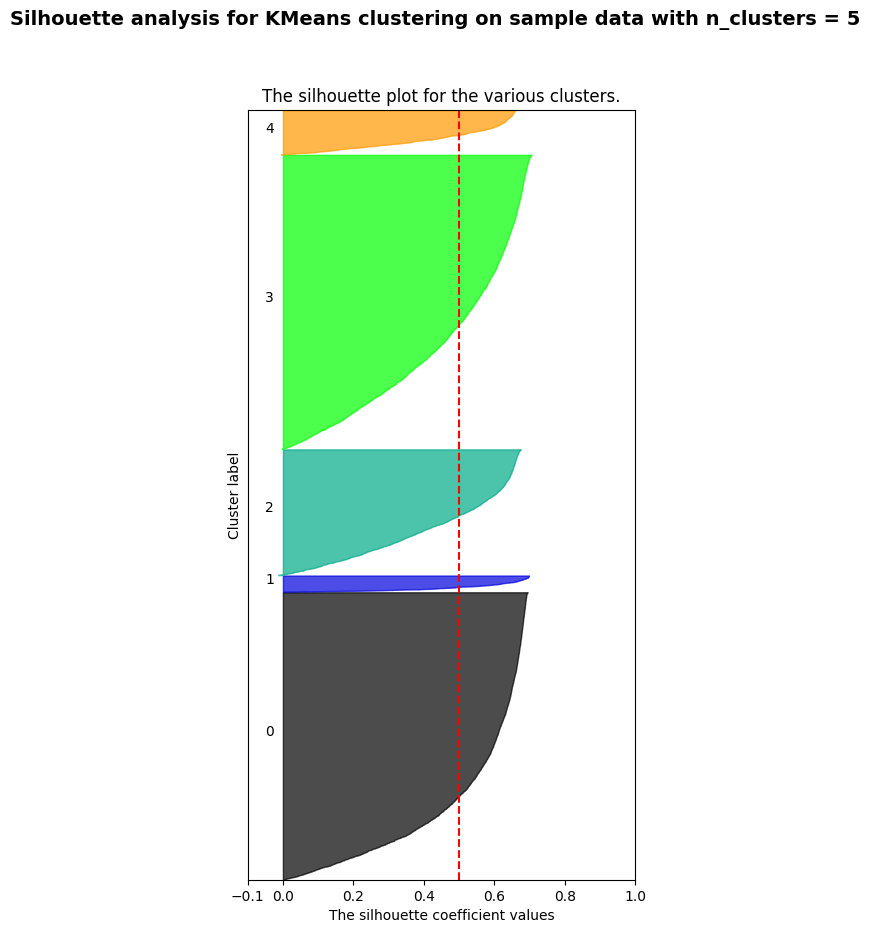

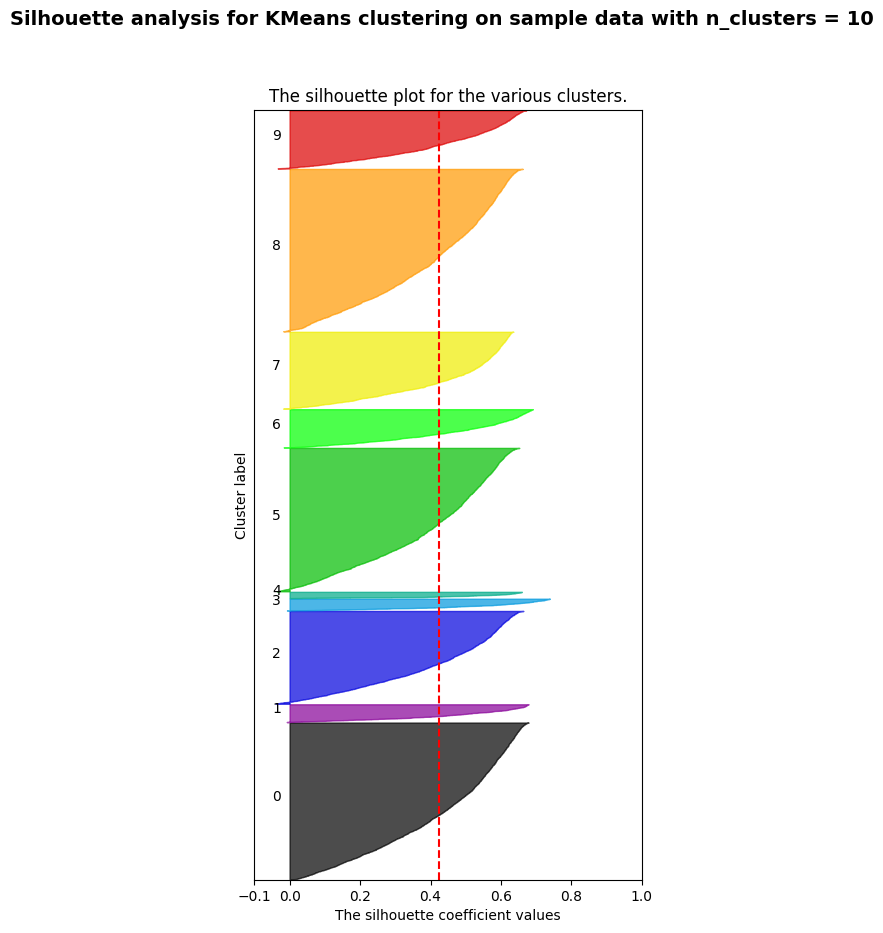

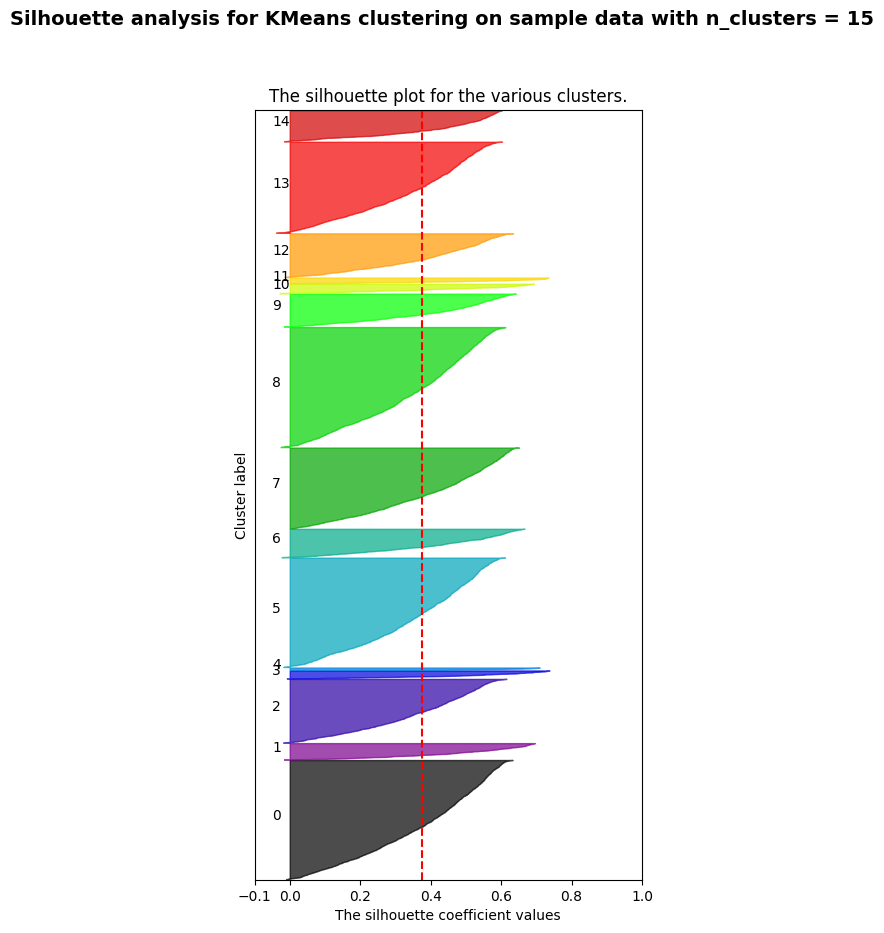

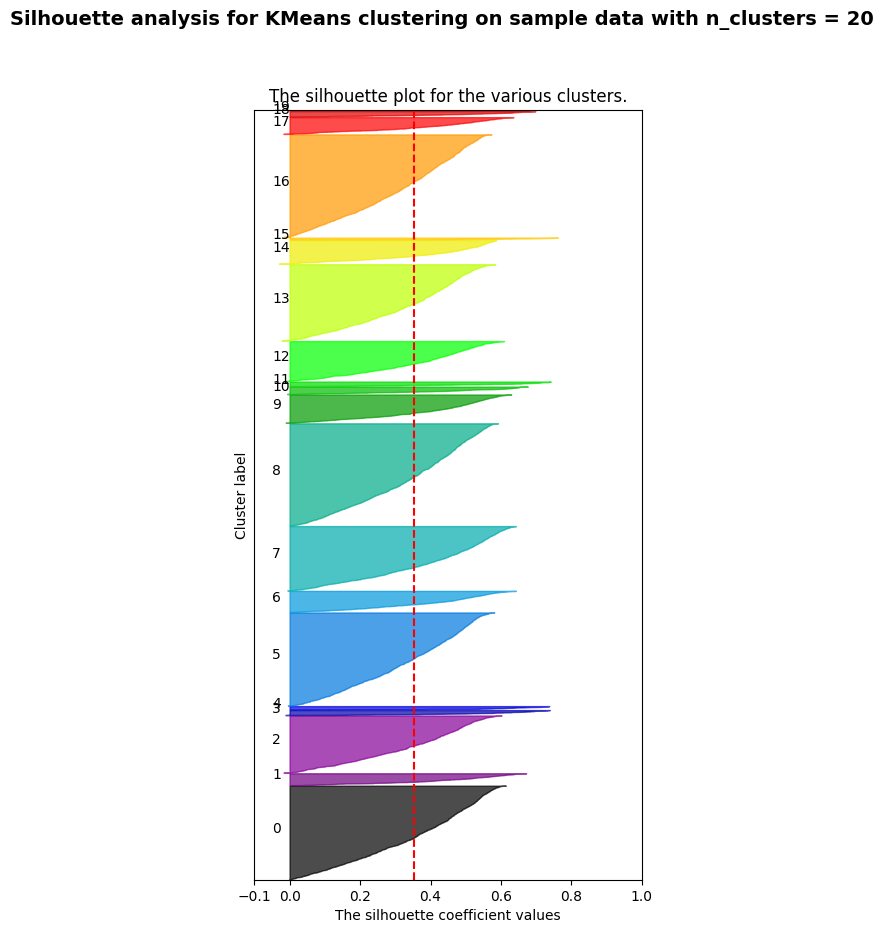

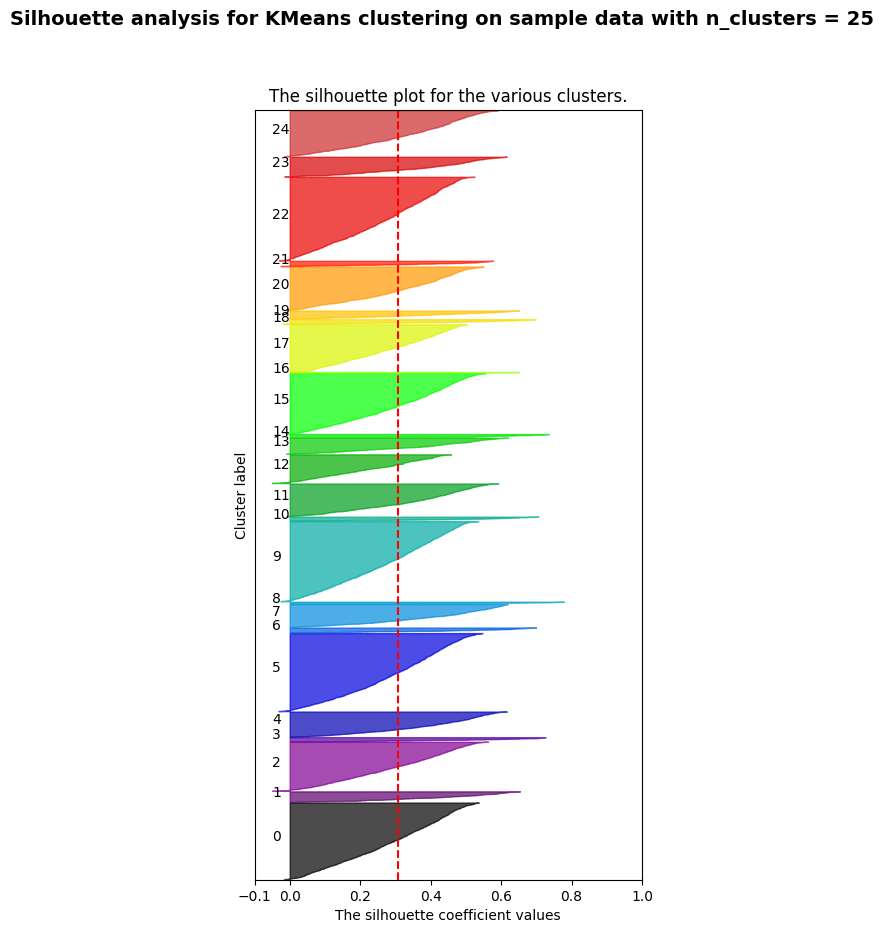

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(5, 30, 5):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(5, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xtrain) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto' ,random_state=10)
    cluster_labels = clusterer.fit_predict(Xtrain)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xtrain, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtrain, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

We see that with less than 20 clusters, there are classes that are disproportionately larger than some of the other ones. We should be fine picking n_clusters = 20 or greater since the records are distributed among clusters better and the silhouette coefficient for each of them is greater than the average indicated by the red dotted line.

### Performing clustering with n_clusters = 20

In [121]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(Xtrain)

### Mapping songs to clusters -- `Artist` and `Track`




In [122]:
df_with_song

Artist                                          Track  \
0         Gorillaz                                 Feel Good Inc.   
1         Gorillaz                                Rhinestone Eyes   
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                             On Melancholy Hill   
4         Gorillaz                                 Clint Eastwood   
...            ...                                            ...   
20713  SICK LEGEND                           JUST DANCE HARDSTYLE   
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP   
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE   
20717  SICK LEGEND                             MISS YOU HARDSTYLE   

                                               Album Album_type  Danceability  \
0                                         Demon Days      album         0.818   
1                                      Plastic Beach      album         0.676   
2      New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                      Plastic Beach      album         0.689   
4                                           Gorillaz      album         0.663   
...                                              ...        ...           ...   
20713                           JUST DANCE HARDSTYLE     single         0.582   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single         0.531   
20715                      OUTSIDE HARDSTYLE SPED UP     single         0.443   
20716                            ONLY GIRL HARDSTYLE     single         0.417   
20717                             MISS YOU HARDSTYLE     single         0.498   

       Energy   Key  Loudness  Speechiness  Acousticness  ...    6    7    8  \
0       0.705   6.0    -6.679       0.1770      0.008360  ...  1.0  0.0  0.0   
1       0.703   8.0    -5.815       0.0302      0.086900  ...  0.0  0.0  1.0   
2       0.923   1.0    -3.930       0.0522      0.042500  ...  0.0  0.0  0.0   
3       0.739   2.0    -5.810       0.0260      0.000015  ...  0.0  0.0  0.0   
4       0.694  10.0    -8.627       0.1710      0.025300  ...  0.0  0.0  0.0   
...       ...   ...       ...          ...           ...  ...  ...  ...  ...   
20713   0.926   5.0    -6.344       0.0328      0.448000  ...  NaN  NaN  NaN   
20714   0.936   4.0    -1.786       0.1370      0.028000  ...  NaN  NaN  NaN   
20715   0.830   4.0    -4.679       0.0647      0.024300  ...  NaN  NaN  NaN   
20716   0.767   9.0    -4.004       0.4190      0.356000  ...  NaN  NaN  NaN   
20717   0.938   6.0    -4.543       0.1070      0.002770  ...  NaN  NaN  NaN   

         9   10   11   12   13   14 Artist_encoded  
0      0.0  0.0  0.0  1.0  0.0  0.0            224  
1      0.0  0.0  0.0  1.0  0.0  0.0            224  
2      0.0  0.0  0.0  0.0  0.0  1.0            224  
3      0.0  0.0  0.0  1.0  0.0  0.0            224  
4      0.0  1.0  0.0  1.0  0.0  0.0            224  
...    ...  ...  ...  ...  ...  ...            ...  
20713  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20714  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20715  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20716  NaN  NaN  NaN  NaN  NaN  NaN           2025  
20717  NaN  NaN  NaN  NaN  NaN  NaN           2025  

[19170 rows x 37 columns]

In [123]:
# Analyzing the cluster labels
# We create a map data structure to map a cluster number to the songs in that cluster

print("The following are the labels associated with each cluster:")
print(kmeans.labels_)
print("Length: " , len(kmeans.labels_))

map = {}
for i in range(len(kmeans.labels_)):
    label = kmeans.labels_[i]

    artist = df_with_song.iloc[i]['Artist']
    track = df_with_song.iloc[i]['Track']

    if label not in map:
        map[label] = [(artist, track),]

    else:
        map[label].append((artist, track))

The following are the labels associated with each cluster:
[10  2  6 ... 17  1 17]
Length:  15336


In [124]:
map

{10: [('Gorillaz', 'Feel Good Inc.'),
  ('Red Hot Chili Peppers', "Can't Stop"),
  ('Red Hot Chili Peppers', 'Snow (Hey Oh)'),
  ('Linkin Park', "What I've Done"),
  ('Radiohead', 'Creep'),
  ('Radiohead', 'No Surprises'),
  ('AC/DC', 'Highway to Hell'),
  ('AC/DC', 'T.N.T.'),
  ('AC/DC', "It's a Long Way to the Top (If You Wanna Rock 'N' Roll)"),
  ('Black Eyed Peas', 'I Gotta Feeling'),
  ('Michael Jackson', 'Chicago'),
  ('Eminem', 'Godzilla (feat. Juice WRLD)'),
  ('Eminem', 'Sing For The Moment'),
  ('Khalid', 'Silence'),
  ('Khalid', 'Location'),
  ('Shakira', "DON'T YOU WORRY"),
  ('Nicky Jam', 'Bella y Sensual'),
  ('The Beatles', 'Yesterday - Remastered 2009'),
  ('Pitbull', 'Feel This Moment (feat. Christina Aguilera)'),
  ('Sean Paul',
   '(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version'),
  ('Sean Paul', "I'm Still in Love with You (feat. Sasha)"),
  ('Elvis Presley', 'Here Comes Santa Claus (Right Down Santa Claus Lane)'),
  ('Elvis Presley', 'Always

### Getting user preferences


In [142]:
def get_user_preferences():
    user_input = []
    print("Please enter your music preferences on a scale of 0 to 1")
    for col in df_cols:
        try:
            rating = float(input(f"{col} score: "))
            assert 0 <= rating <= 1, "\nASSERT FAILED: Score must be between 0 and 1"
            user_input.append (rating)
        except AssertionError as e:
            print(e)
            break
        except ValueError:
            print("\nEXCEPTION ENCOUNTERED: Input must be a number.")
            break
    return np.array(user_input)

user_preferences = get_user_preferences()

Please enter your music preferences on a scale of 0 to 1
Danceability score: 0.9
Energy score: 0.9
Loudness score: 0.9
Speechiness score: 0.9
Acousticness score: 0.9


### Obtaining the cluster corresponding to user preferences

In [143]:
user_preferences = user_preferences.reshape(1, 5)
user_preferences_df = pd.DataFrame(user_preferences, columns=df_cols)
user_preferences_df

Danceability  Energy  Loudness  Speechiness  Acousticness
0           0.9     0.9       0.9          0.9           0.9

In [144]:
cluster = kmeans.predict(user_preferences_df)[0]
print("Cluster the user's preferences fit into:", cluster)

Cluster the user's preferences fit into: 12


### Obtaining a random sample of songs corresponding to the cluster associated with the user

In [145]:
import random

NUM_SONSGS_TO_SUGGEST = 5

songs_rec = random.sample(map[cluster], NUM_SONSGS_TO_SUGGEST)

In [146]:
print("Here are songs you may like...")

songs_rec_df = pd.DataFrame(songs_rec, columns=['Artist', 'Title'])

Here are songs you may like...


In [147]:
songs_rec_df

Artist                                              Title
0  Steve Miller Band                                          Rock'n Me
1                 YG  That's My N**** (with Meek Mill, YG & Snoop Dogg)
2        Luis Miguel                              Por Debajo De La Mesa
3        Eric Church                                 Doing Life With Me
4  Stephanie Beatriz                                Carnaval Del Barrio

In [148]:
# Get the information from the database about one of the songs that were recommended.
getArtist = songs_rec_df.iloc[0]['Artist']
getTrack = songs_rec_df.iloc[0]['Title']

In [149]:
df_with_song[(df_with_song['Artist'] == getArtist) & (df_with_song['Track'] == getTrack)]

Artist      Track              Album Album_type  \
11849  Steve Miller Band  Rock'n Me  Fly Like An Eagle      album   

       Danceability  Energy  Key  Loudness  Speechiness  Acousticness  ...  \
11849         0.695   0.582  4.0    -11.35       0.0651         0.297  ...   

         6    7    8    9   10   11   12   13   14 Artist_encoded  
11849  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0           1817  

[1 rows x 37 columns]

## Training and Test Accuracy of our First Model

Now we'll find the training error using Within-Cluster Sum of Square metrics. Note that we divide by the length of the training set to account for the fact that WCSS takes a simple sum, and the training/test set will be disproportionately sized.

In [150]:
# Inertia of the kmeans model refers to sum of squared distances of samples to
# their closest cluster center.
kmeans.inertia_ / len(Xtrain)

0.24465266367942318

Now we'll find the testing error.

In [151]:
train_cluster_labels = kmeans.predict(X_test)

wcss_train = 0
for i in range (n_clusters):
  center = kmeans.cluster_centers_[i]
  train_labels = X_test[train_cluster_labels == i]
  wcss_train += np.sum((train_labels - center)**2)

wcss_test = np.sum(wcss_train)

wcss_test / len(X_test)

0.23651321484164592

We find that our training error and testing error, as measured by WCSS, are very similar.  This suggests that our model is neither overfitting nor underfitting, as either of these situations should suggest a larger discrepancy between our errors.  Thus, on the fitting graph, we are in a well-situated spot.

# Citations

Used sklearn documentation to code out k means clustering and silhouette_score evaluation